<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Diplodatos-Kaggle-Competition" data-toc-modified-id="Diplodatos-Kaggle-Competition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Diplodatos Kaggle Competition</a></span><ul class="toc-item"><li><span><a href="#WEEKDAY" data-toc-modified-id="WEEKDAY-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>WEEKDAY</a></span></li><li><span><a href="#Feature-creada" data-toc-modified-id="Feature-creada-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature creada</a></span></li><li><span><a href="#UPC" data-toc-modified-id="UPC-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>UPC</a></span></li><li><span><a href="#XGBOST" data-toc-modified-id="XGBOST-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>XGBOST</a></span></li><li><span><a href="#Regresion-Logistica" data-toc-modified-id="Regresion-Logistica-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regresion Logistica</a></span></li><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Perceptron</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#NN" data-toc-modified-id="NN-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>NN</a></span></li><li><span><a href="#Nearest-Centroid" data-toc-modified-id="Nearest-Centroid-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Nearest Centroid</a></span></li></ul></li></ul></div>

# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

Read the *original* dataset...

In [2]:
original_df = pd.read_csv('../data/train.csv')

In [3]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

**TripType** is the column that we should predict. That column is not present in the test set

In [4]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [5]:
original_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0


Looking into the columns values...

In [6]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [7]:
set(original_df.DepartmentDescription)

{'1-HR PHOTO',
 'ACCESSORIES',
 'AUTOMOTIVE',
 'BAKERY',
 'BATH AND SHOWER',
 'BEAUTY',
 'BEDDING',
 'BOOKS AND MAGAZINES',
 'BOYS WEAR',
 'BRAS & SHAPEWEAR',
 'CAMERAS AND SUPPLIES',
 'CANDY, TOBACCO, COOKIES',
 'CELEBRATION',
 'COMM BREAD',
 'CONCEPT STORES',
 'COOK AND DINE',
 'DAIRY',
 'DSD GROCERY',
 'ELECTRONICS',
 'FABRICS AND CRAFTS',
 'FINANCIAL SERVICES',
 'FROZEN FOODS',
 'FURNITURE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'GROCERY DRY GOODS',
 'HARDWARE',
 'HEALTH AND BEAUTY AIDS',
 'HOME DECOR',
 'HOME MANAGEMENT',
 'HORTICULTURE AND ACCESS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'HOUSEHOLD PAPER GOODS',
 'IMPULSE MERCHANDISE',
 'INFANT APPAREL',
 'INFANT CONSUMABLE HARDLINES',
 'JEWELRY AND SUNGLASSES',
 'LADIES SOCKS',
 'LADIESWEAR',
 'LARGE HOUSEHOLD GOODS',
 'LAWN AND GARDEN',
 'LIQUOR,WINE,BEER',
 'MEAT - FRESH & FROZEN',
 'MEDIA AND GAMING',
 'MENS WEAR',
 'MENSWEAR',
 'OFFICE SUPPLIES',
 'OPTICAL - FRAMES',
 'OPTICAL - LENSES',
 'OTHER DEPARTMENTS',
 'PAINT AND ACCESSORIES',
 'PER

There are `nan`s in the column, let us find them...

In [8]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [9]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [10]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


But it may be the case that Upc is NaN but not the description...

In [11]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [12]:
bins = set(original_df.TripType)

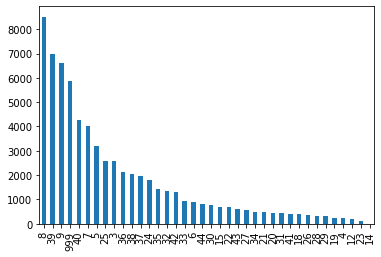

In [13]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [14]:
df = original_df.drop(["TripType"], axis=1)

In [15]:
df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0
...,...,...,...,...,...,...
453406,191344,Sunday,7.315096e+10,1,BEAUTY,3405.0
453407,191344,Sunday,6.505300e+10,1,WIRELESS,1712.0
453408,191344,Sunday,7.918131e+09,1,BEAUTY,3405.0
453409,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


In [16]:
df.loc[df["ScanCount"] < 0, "Return"] = 1
df.loc[df["Return"] != 1, "Return"] = 0


In [17]:
df["Pos_Sum"] = df["ScanCount"]

df.loc[df["Pos_Sum"] < 0, "Pos_Sum"] = 0


In [18]:
df["Neg_Sum"] = df["ScanCount"]

df.loc[df["Neg_Sum"] > 0, "Neg_Sum"] = 0


In [19]:
df.sample(5)

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Return,Pos_Sum,Neg_Sum
274788,115261,Tuesday,2.100005e+09,1,GROCERY DRY GOODS,3201.0,0.0,1,0
276300,115984,Tuesday,9.100010e+08,1,AUTOMOTIVE,1006.0,0.0,1,0
295678,124651,Wednesday,7.192105e+09,1,FROZEN FOODS,9117.0,0.0,1,0
233592,99276,Saturday,NaN,1,NaN,NaN,0.0,1,0
227354,97033,Saturday,8.500002e+09,-1,"LIQUOR,WINE,BEER",2300.0,1.0,0,-1


## WEEKDAY

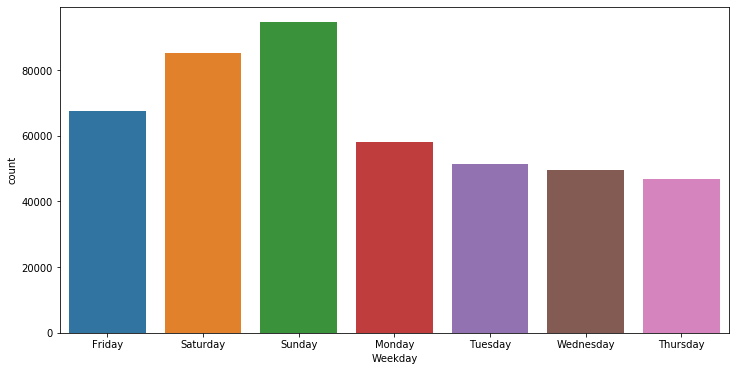

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(df.Weekday)

In [21]:
df.groupby('Weekday')['Weekday'].count()

Weekday
Friday       67525
Monday       58139
Saturday     85356
Sunday       94602
Thursday     46803
Tuesday      51463
Wednesday    49523
Name: Weekday, dtype: int64

Now, we create the dummy columns

In [22]:
df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

In [23]:
df

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,Return,Pos_Sum,Neg_Sum,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,6.811315e+10,-1,1000.0,1.0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1.070081e+09,1,115.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Friday,3.107000e+03,1,103.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,Friday,4.011000e+03,1,5501.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Friday,6.414410e+09,1,2008.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453406,191344,Sunday,7.315096e+10,1,3405.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453407,191344,Sunday,6.505300e+10,1,1712.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
453408,191344,Sunday,7.918131e+09,1,3405.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453409,191347,Sunday,4.190008e+09,1,1512.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [24]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

In [25]:
def week(x):
  if x=='Monday':
    return 0
  elif x=='Tuesday':
    return 1
  elif x=='Wednesday':
    return 2
  elif x=='Thursday':
    return 3
  elif x=='Friday':
    return 4
  elif x=='Saturday':
    return 5
  elif x=='Sunday':
    return 6 

In [26]:
df['w_num']=df.Weekday.apply(week)

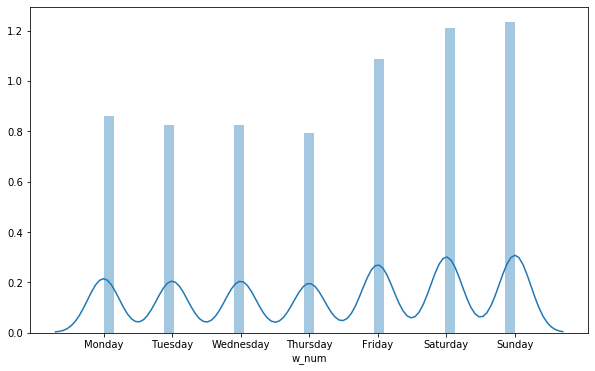

In [27]:
fig,axs=plt.subplots(figsize=(10,6))
sns.distplot(df['w_num'],ax=axs)
ticks=list(range(0,7))
axs.set_xticks(ticks)
x_tick_label=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
axs.set_xticklabels(x_tick_label)
plt.show()

## Feature creada

In [28]:
#prod_porvisita=df.groupby(['VisitNumber'])['Upc'].count()
#prod_porvisita

In [29]:
#prod_porvisita_dict=dict(prod_porvisita)


In [30]:
#df['num_of_products_for_VisitNumber']=df['VisitNumber'].apply(lambda x:prod_porvisita_dict.get(x,0))

In [31]:
#df.num_of_products_for_VisitNumber.nunique()

In [32]:
#plt.figure(figsize=(12,6))
#sns.distplot(df.num_of_products_for_VisitNumber,bins=99)

## UPC

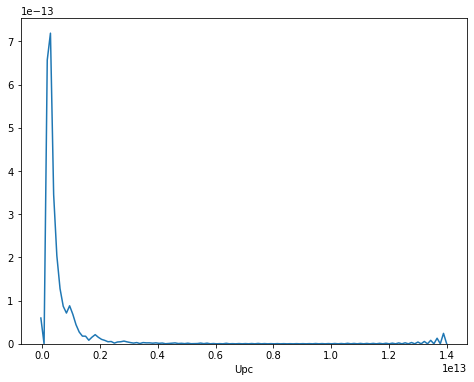

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df.Upc,hist=False)

In [34]:
def float_to_str(obj):
    """
    Convert Upc code from float to string
    Use this function by applying lambda
    :param obj: "Upc" column of DataFrame
    :return: string converted Upc removing dot.
    """
    while obj != "nan":
        obj = str(obj).split(".")[0]
        return obj

In [35]:

def company(x):
    """
    Return company code from given Upc code.
    :param x: "Upc" column of DataFrame
    :return: company code
    """
    try:
        p = x[:6]
        if p == "000000":
            return x[-5]
        return p
    except:
        return -9999

In [36]:
df["Upc"] = df.Upc.apply(float_to_str)

df["company"] = df.Upc.apply(company) 


In [37]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop([ "FinelineNumber"], axis=1)

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)
    
    #df = pd.get_dummies(df, columns=["Return"], dummy_na=True)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [38]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

Create the model and evaluate it

In [39]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [1, 100],
    'criterion' :['gini', 'entropy']
}

rfc_clf = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
rfc_clf.fit(X_train, y_train)
best_rfc_clf = rfc_clf.best_estimator_

In [43]:
print('Best RF accuracy: ', rfc_clf.best_score_)
print(best_rfc_clf)
results = results.append({'clf': best_rfc_clf, 'best_acc': rfc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best RF accuracy:  0.6757033248081842
RandomForestClassifier(random_state=42)
The best classifier so far is: 
RandomForestClassifier(random_state=42)


**And finally**, we predict the unknown label for the testing set

In [49]:
yy_predict = results.loc[results['best_acc'].idxmax()]['clf'].predict(X_valid)

In [52]:
print(results.loc[results['best_acc'].idxmax()]['clf'])
print(accuracy_score(y_valid, yy_predict))

RandomForestClassifier(random_state=42)
0.6820826495598985


In [53]:
X.shape, XX.shape

((67029, 80), (28645, 80))

In [54]:
yy = results.clf.iloc[0].predict(XX)

The last thing we do is generating a file that should be *submitted* on kaggle

In [55]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [56]:
submission.to_csv("../data/submission.csv", header=True, index=False)

## XGBOST

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Regresion Logistica

## Perceptron

## SVM

## NN

## Nearest Centroid

GRUPO 11 - Nazareno Medrano,Cristian Salgado,David Veisaga,Fernado Apaza